In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import keras
from keras import layers

sns.set_style("white")

current_dir = os.path.abspath("")
print(f"{current_dir=}")

files_current_dir = os.listdir(current_dir)
print(f"{files_current_dir=}")

data_dir = os.path.abspath("../Data")
print(f"{data_dir=}")

current_dir='/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/Lectures'
files_current_dir=['Lec01_02.ipynb', 'Lec01_01.ipynb', 'Lec04_01.ipynb', 'Lec02_01.ipynb']
data_dir='/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/Data'


Original shape (390, 190, 4)


(195, 95, 4)

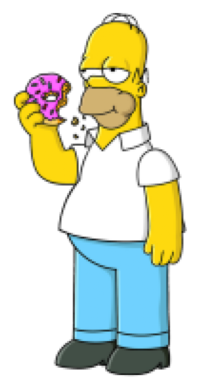

In [7]:
img = plt.imread(f"{data_dir}/Homer_Simpson_2006.png")
print(f"Original shape {img.shape}")

# want to make it smallers
resize_factor = .5
new_size = (int(img.shape[1]*resize_factor), int(img.shape[0]*resize_factor))

img = cv2.resize(img, new_size)
plt.imshow(img)
plt.axis("off");
img.shape

In [8]:
edge_filter = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

# adjust the values of the filter and see different effects
outline_filter = np.array([[-1, -1, -1],
                           [-1, 4, -1],
                           [-1, -1, -1]])

filters = [edge_filter, blur_filter, outline_filter]
filter_names = ["Edge", "Blur", "Outline"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3568628..2.3813725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.6813726..1.2637255].


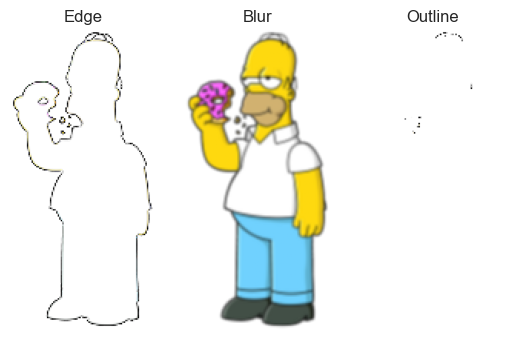

In [9]:
processed_images_path = f"{data_dir}/processed_images"

try:
    os.mkdir(processed_images_path)
except FileExistsError as err:
    pass

fig, axes = plt.subplots(1, len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(img,-1, kernel = filter)
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set(title = f"{filter_name}")

fig.savefig(f"{processed_images_path}/Filtered_images.png")

In [11]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype("float32") / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype("float32") / 255

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8819 - loss: 0.3679
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9850 - loss: 0.0476
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9903 - loss: 0.0325
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9931 - loss: 0.0222
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9947 - loss: 0.0170


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0380


(0.02843889407813549, 0.9909999966621399)